# Trabajo Practico 

1. Generar un DataFrame con los datos de los cuatro ficheros.
2. Filtrar las columnas del DataFrame para quedarse con las columnas ESTACION, MAGNITUD, AÑO, MES
y las correspondientes a los días D01, D02, etc.
3. Reestructurar el DataFrame para que los valores de los contaminantes de las columnas de los días aparezcan en una única columna.
4. Añadir una columna con la fecha a partir de la concatenación del año, el mes y el día (usar el módulo
datetime).
5. Eliminar las filas con fechas no válidas (utilizar la función isnat del módulo numpy) y ordenar el DataFrame por estaciones, contaminantes y fecha.
6. Mostrar por pantalla las estaciones y los contaminantes disponibles en el DataFrame.
7. Mostrar un resumen descriptivo (mímino, máximo, media, etc) para cada contaminante.
8. Mostrar un resumen descriptivo para cada contaminente por distritos.
9. Crear una función que reciba una estación, un contaminante y un rango de fechas y devuelva una serie
con las emisiones del contaminante dado en la estación y rango de fechas dado.
10. Crear un función que reciba una estación de medición y devuelva un DataFrame con las medias mensuales de los distintos tipos de contaminantes.
11. Crear una función que reciba un mes y una magnitud y devuelva un diccionario con las medias de las
estaciones de medición de la magnitud durante ese mes.
12. Crear una función que reciba una magnitud y genere un gráfico con las medias mensuales para cada estación de medición.

###Imports

In [ ]:
#Importamos las librerias que vamos a usar y les ponemos un alias
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


### Agregar Archivos 

1. Generar un DataFrame con los datos de los cuatro ficheros

In [ ]:
#De esta manera cargamos los archivos en la notebook del colab
from google.colab import files
uploaded = files.upload()
import io 

Saving emisiones-2016.csv to emisiones-2016.csv
Saving emisiones-2017.csv to emisiones-2017.csv
Saving emisiones-2018.csv to emisiones-2018.csv
Saving emisiones-2019.csv to emisiones-2019.csv


In [ ]:
%%bash 
ls 

emisiones-2016.csv
emisiones-2017.csv
emisiones-2018.csv
emisiones-2019.csv
sample_data


In [ ]:
%%bash 
head emisiones-2016.csv

PROVINCIA;MUNICIPIO;ESTACION;MAGNITUD;PUNTO_MUESTREO;ANO;MES;D01;V01;D02;V02;D03;V03;D04;V04;D05;V05;D06;V06;D07;V07;D08;V08;D09;V09;D10;V10;D11;V11;D12;V12;D13;V13;D14;V14;D15;V15;D16;V16;D17;V17;D18;V18;D19;V19;D20;V20;D21;V21;D22;V22;D23;V23;D24;V24;D25;V25;D26;V26;D27;V27;D28;V28;D29;V29;D30;V30;D31;V31
28;079;4;1;28079004_1_38;2016;01;00008;V;00007;V;00006;V;00006;V;00007;V;00006;V;00006;V;00006;V;00006;V;00006;V;00006;V;00007;V;00011;V;00008;V;00008;V;00009;V;00009;V;00008;V;00011;V;00010;V;00009;V;00010;V;00011;V;00011;V;00013;V;00012;V;00009;V;00007;V;00008;V;00009;V;00009;V
28;079;4;1;28079004_1_38;2016;02;00012;V;00013;V;00009;V;00009;V;00011;V;00009;V;00007;V;00007;V;00007;V;00007;V;00007;V;00007;V;00007;V;00007;V;00007;V;00008;V;00008;V;00007;V;00009;V;00011;V;00010;V;00011;V;00010;V;00009;V;00008;V;00007;V;00007;V;00008;V;00009;V;00000;N;00000;N
28;079;4;1;28079004_1_38;2016;03;00011;V;00010;V;00009;V;00009;V;00007;V;00008;V;00008;V;00008;V;00009;V;00008;V;00009;V;00009;V;

###EJERCICIO 1

In [ ]:
# Leo los archivos y los guardo como dataframes
em16 = pd.read_csv('emisiones-2016.csv',sep=';',decimal=',')
em17 = pd.read_csv('emisiones-2017.csv',sep=';',decimal=',')
em18 = pd.read_csv('emisiones-2018.csv',sep=';',decimal=',')
em19 = pd.read_csv('emisiones-2019.csv',sep=';',decimal=',')
# Uno todos los dataFrame en 1 solo 
mix =  pd.concat([em16,em17,em18,em19])  
mixTodo =  pd.concat([em16,em17,em18,em19])

In [ ]:
deseados = ['PROVINCIA','MUNICIPIO','ESTACION','ANO','MES']
for i in mixTodo.columns: 
#para las columnas de dias nos fijamos si tiene la D
  if 'D' in i:
    continue
  elif i not in deseados:
    del mixTodo[i]

print(mixTodo)

      PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD  ...    D28    D29    D30    D31
0            28         79         4         1  ...  00007  00008  00009  00009
1            28         79         4         1  ...  00008  00009  00000  00000
2            28         79         4         1  ...  00007  00008  00010  00008
3            28         79         4         1  ...  00008  00008  00008  00000
4            28         79         4         1  ...  00007  00007  00007  00007
...         ...        ...       ...       ...  ...    ...    ...    ...    ...
1831         28         79        60        14  ...  00090  00099  00108  00098
1832         28         79        60        14  ...  00068  00070  00055  00000
1833         28         79        60        14  ...  00033  00016  00019  00047
1834         28         79        60        14  ...  00052  00047  00056  00000
1835         28         79        60        14  ...  00013  00014  00005  00004

[7266 rows x 37 columns]


###EJERCICIO 2

2. Filtrar las columnas del DataFrame para quedarse con las columnas ESTACION, MAGNITUD, AÑO, MES y las correspondientes a los días D01, D02, etc

In [ ]:
#Me fijo si las columnas son las que necesitamos y sino las borramos
deseados = ['ESTACION','ANO','MES']
for i in mix.columns: 
#para las columnas de dias nos fijamos si tiene la D
  if 'D' in i:
    continue
  elif i not in deseados:
    del mix[i]

print(mix)

      ESTACION  MAGNITUD   ANO  MES    D01  ...    D27    D28    D29    D30    D31
0            4         1  2016    1  00008  ...  00009  00007  00008  00009  00009
1            4         1  2016    2  00012  ...  00007  00008  00009  00000  00000
2            4         1  2016    3  00011  ...  00008  00007  00008  00010  00008
3            4         1  2016    4  00008  ...  00009  00008  00008  00008  00000
4            4         1  2016    5  00007  ...  00007  00007  00007  00007  00007
...        ...       ...   ...  ...    ...  ...    ...    ...    ...    ...    ...
1831        60        14  2019    8  00094  ...  00088  00090  00099  00108  00098
1832        60        14  2019    9  00088  ...  00054  00068  00070  00055  00000
1833        60        14  2019   10  00044  ...  00028  00033  00016  00019  00047
1834        60        14  2019   11  00041  ...  00055  00052  00047  00056  00000
1835        60        14  2019   12  00047  ...  00017  00013  00014  00005  00004

[72

###EJERCICIO 3

3. Reestructurar el DataFrame para que los valores de los contaminantes de las columnas de los días aparezcan en una única columna.

In [ ]:
#Reestructuramos el dataframe de forma vertical o larga
mix_largo = mix.melt(id_vars=[ 'ESTACION' , 'MAGNITUD', 'ANO', 'MES'] , var_name= 'DIAS' , value_name='ValContam' )
print(mix_largo)


        ESTACION  MAGNITUD   ANO  MES DIAS ValContam
0              4         1  2016    1  D01     00008
1              4         1  2016    2  D01     00012
2              4         1  2016    3  D01     00011
3              4         1  2016    4  D01     00008
4              4         1  2016    5  D01     00007
...          ...       ...   ...  ...  ...       ...
225241        60        14  2019    8  D31     00098
225242        60        14  2019    9  D31     00000
225243        60        14  2019   10  D31     00047
225244        60        14  2019   11  D31     00000
225245        60        14  2019   12  D31     00004

[225246 rows x 6 columns]


###EJERCICIO 4

4. Añadir una columna con la fecha a partir de la concatenación del año, el mes y el día (usar el módulo datetime)

In [ ]:
############################################################################
#         NO EJECUTAR
############################################################################

# Se crea las listas con los datos 
anos= mix_largo['ANO'].tolist()
meses= mix_largo['MES'].tolist()
# Quita las D de los dias 
dias= mix_largo['DIAS'].str.strip('D').tolist()

fechas = []

#le damos formato a los datos para que se guarden en una lista como datetime
for i in range(len(mix_largo)):
  fecha= str(anos[i]) + "-" + str(meses[i]) + "-" + str(dias[i])
  try:
    fechaD=dt.datetime.strptime(fecha,'%Y-%m-%d')
    fechas.append(fechaD)
  except:
    fechas.append(pd.NaT)
    continue

mix_largo['FECHAS']= fechas

print(mix_largo)

        ESTACION  MAGNITUD   ANO  MES DIAS ValContam     FECHAS
0              4         1  2016    1  D01     00008 2016-01-01
1              4         1  2016    2  D01     00012 2016-02-01
2              4         1  2016    3  D01     00011 2016-03-01
3              4         1  2016    4  D01     00008 2016-04-01
4              4         1  2016    5  D01     00007 2016-05-01
...          ...       ...   ...  ...  ...       ...        ...
225241        60        14  2019    8  D31     00098 2019-08-31
225242        60        14  2019    9  D31     00000        NaT
225243        60        14  2019   10  D31     00047 2019-10-31
225244        60        14  2019   11  D31     00000        NaT
225245        60        14  2019   12  D31     00004 2019-12-31

[225246 rows x 7 columns]


In [ ]:

# Preguntar rodri 
mix_largo['FECHAS'] = pd.to_datetime(mix_largo['FECHAS'], format="%Y/%m/%d", errors='coerce')
# print(mix_largo)

###EJERCICIO 5

5. Eliminar las filas con fechas no válidas (utilizar la función isnat del módulo numpy) y ordenar el DataFrame por estaciones, contaminantes y fecha.




In [ ]:
#eliminamos fechas invalidas
mix_largo.drop(mix_largo[np.isnat(mix_largo['FECHAS'])].index, inplace=True)
#mix_largo.dropna()
print(mix_largo)

#mix_largo = mix_largo.drop(mix_largo[mix_largo['FECHAS']==pd.NaT].index)
mix_ordenado = mix_largo.sort_values(by=['ESTACION','MAGNITUD','FECHAS'], ascending=True)
print(mix_ordenado)

        ESTACION  MAGNITUD   ANO  MES DIAS ValContam     FECHAS
0              4         1  2016    1  D01     00008 2016-01-01
1              4         1  2016    2  D01     00012 2016-02-01
2              4         1  2016    3  D01     00011 2016-03-01
3              4         1  2016    4  D01     00008 2016-04-01
4              4         1  2016    5  D01     00007 2016-05-01
...          ...       ...   ...  ...  ...       ...        ...
225238        60        14  2019    5  D31     00085 2019-05-31
225240        60        14  2019    7  D31     00092 2019-07-31
225241        60        14  2019    8  D31     00098 2019-08-31
225243        60        14  2019   10  D31     00047 2019-10-31
225245        60        14  2019   12  D31     00004 2019-12-31

[221158 rows x 7 columns]
        ESTACION  MAGNITUD   ANO  MES DIAS ValContam     FECHAS
0              4         1  2016    1  D01     00008 2016-01-01
7266           4         1  2016    1  D02     00007 2016-01-02
14532        

###EJERCICIO 6

6. Mostrar por pantalla las estaciones y los contaminantes disponibles en el DataFrame.

In [ ]:
datosEstacion = {
  1: 'P.Recoletos',
  2: 'Glta.de Carlos V',
  35: 'Pza. del Carmen',
  4: 'Pza. de España',
  39: 'Barrio del Pilar',
  6: 'Pza. Dr. Marañón',
  7: 'Pza. M. de Salamanca',
  8: 'Escuelas Aguirre',
  9: 'Pza. Luca de Tena',
  38: 'Cuatro Caminos',
  11: 'Av. Ramón y Cajal',
  12: 'Pza. Manuel Becerra',
  40: 'Vallecas',
  14: 'Pza. Fdez. Ladreda',
  15: 'Pza. Castilla',
  16: 'Arturo Soria',
  17: 'Villaverde Alto',
  18: 'Calle Farolillo',
  19: 'Huerta Castañeda',
  36: 'Moratalaz',
  21: 'Pza. Cristo Rey',
  22: 'P. Pontones',
  23: 'Final C/ Alcalá',
  24: 'Casa de Campo',
  25: 'Santa Eugenia',
  26: 'Urb. Embajada (Barajas)',
  27: 'Barajas',
  47: 'Méndez Álvaro',
  48: 'P. Castellana',
  49: 'Retiro',
  50: 'Pza. Castilla',
  54: 'Ensanche Vallecas',
  55: 'Urb. Embajada (Barajas)',
  56: 'Plaza Elíptica',
  57: 'Sanchinarro',
  58: 'El Pardo',
  59: 'Parque Juan Carlos I',
  60: 'Tres Olivos'
}

datosContaminantes = {
  1: 'Dióxido de Azufre',
  6: 'Monóxido de Carbono',
  7: 'Monóxido de Nitrógeno',
  8: 'Dióxido de Nitrógeno',
  9: 'Partículas < 2.5 µm',
  10: 'Partículas < 10 µm',
  12: 'Óxidos de Nitrógeno',
  14: 'Ozono',
  20: 'Tolueno',
  30: 'Benceno',
  35: 'Etilbenceno',
  37: 'Metaxileno',
  38: 'Paraxileno',
  39: 'Ortoxileno',
  42: 'Hidrocarburos totales(hexano)',
  43: 'Metano',
  44: 'Hidrocarburosno metánicos (hexano)'
}

In [ ]:

#hacemos las listas por comprension 
estacionDisponible = [datosEstacion[x] for x in datosEstacion.keys() if x in mix_ordenado['ESTACION']]

datosConta= [datosContaminantes[x] for x in datosContaminantes.keys() if x in mix_ordenado['MAGNITUD']]

print(estacionDisponible)
print(len(estacionDisponible))
print(datosConta)


['P.Recoletos', 'Glta.de Carlos V', 'Pza. del Carmen', 'Pza. de España', 'Barrio del Pilar', 'Pza. Dr. Marañón', 'Pza. M. de Salamanca', 'Escuelas Aguirre', 'Pza. Luca de Tena', 'Cuatro Caminos', 'Av. Ramón y Cajal', 'Pza. Manuel Becerra', 'Vallecas', 'Pza. Fdez. Ladreda', 'Pza. Castilla', 'Arturo Soria', 'Villaverde Alto', 'Calle Farolillo', 'Huerta Castañeda', 'Moratalaz', 'Pza. Cristo Rey', 'P. Pontones', 'Final C/ Alcalá', 'Casa de Campo', 'Santa Eugenia', 'Urb. Embajada (Barajas)', 'Barajas', 'Méndez Álvaro', 'P. Castellana', 'Retiro', 'Pza. Castilla', 'Ensanche Vallecas', 'Urb. Embajada (Barajas)', 'Plaza Elíptica', 'Sanchinarro', 'El Pardo', 'Parque Juan Carlos I', 'Tres Olivos']
38
['Dióxido de Azufre', 'Monóxido de Carbono', 'Monóxido de Nitrógeno', 'Dióxido de Nitrógeno', 'Partículas < 2.5 µm', 'Partículas < 10 µm', 'Óxidos de Nitrógeno', 'Ozono', 'Tolueno', 'Benceno', 'Etilbenceno', 'Metaxileno', 'Paraxileno', 'Ortoxileno', 'Hidrocarburos totales(hexano)', 'Metano', 'Hidroca

###EJERCICIO 7

7. Mostrar un resumen descriptivo (mímino, máximo, media, etc) para cada contaminante.

In [ ]:


mix_ordenado['ValContam']=mix_ordenado['ValContam'].apply(float)
mix_ordenado.groupby('MAGNITUD').ValContam.describe()


count       mean         std   min    25%    50%    75%       max
MAGNITUD                                                                     
1         14610.0   7.428953    7.012504  0.00   4.00   7.00  10.00    610.00
6         14610.0   0.350233    0.215935  0.00   0.20   0.30   0.40     14.90
7         35064.0  20.446412  135.123509  0.00   4.00   9.00  23.00  24742.00
8         35064.0  37.677618   20.118050  0.00  22.00  35.00  50.00    148.00
9          8948.0  10.087729   10.643591  0.00   6.00   9.00  13.00    850.00
10        17897.0  18.772923   35.723619  0.00  10.00  16.00  24.00   4481.00
12        35064.0  67.959417   61.443940  0.00  29.00  48.00  84.00   1005.00
14        20454.0  49.941772   24.753120  0.00  31.00  52.00  69.00    336.00
20         8766.0   2.364944    4.236706  0.00   0.80   1.60   2.80    195.00
30         8766.0   0.531371    0.538180  0.00   0.20   0.40   0.70     15.10
35         8766.0   0.479751    1.183618  0.00   0.10   0.20   0.50     35.70
42         4383.0   1.400897    0.251836 -0.01   1.25   1.38   1.54      3.09
43         4383.0   1.292923    0.230898 -0.14   1.17   1.28   1.43      2.77
44         4383.0   0.108941    0.068776  0.00   0.06   0.10   0.14      1.31

###EJERCICIO 8

8. Mostrar un resumen descriptivo para cada contaminente por distritos.

In [ ]:
mixTodo = mixTodo.melt(id_vars=[ 'PROVINCIA','MUNICIPIO','ESTACION' , 'MAGNITUD', 'ANO', 'MES'] , var_name= 'DIAS' , value_name='ValContam' )
print(mixTodo)
mixTodo['ValContam']=mixTodo['ValContam'].apply(float)
mixTodo.groupby(['PROVINCIA','MUNICIPIO']).ValContam.describe()

        PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD   ANO  MES DIAS ValContam
0              28         79         4         1  2016    1  D01     00008
1              28         79         4         1  2016    2  D01     00012
2              28         79         4         1  2016    3  D01     00011
3              28         79         4         1  2016    4  D01     00008
4              28         79         4         1  2016    5  D01     00007
...           ...        ...       ...       ...   ...  ...  ...       ...
225241         28         79        60        14  2019    8  D31     00098
225242         28         79        60        14  2019    9  D31     00000
225243         28         79        60        14  2019   10  D31     00047
225244         28         79        60        14  2019   11  D31     00000
225245         28         79        60        14  2019   12  D31     00004

[225246 rows x 8 columns]


count       mean        std  ...   50%   75%      max
PROVINCIA MUNICIPIO                                  ...                     
28        79         225246.0  26.745318  64.888695  ...  13.0  39.0  24742.0

[1 rows x 8 columns]

###EJERCICIO 9

9. Crear una función que reciba una estación, un contaminante y un rango de fechas y devuelva una serie con las emisiones del contaminante dado en la estación y rango de fechas dado.

In [ ]:
## Preguntar a rodri como devuelve  FALTA

def devolver_Emisiones(mix,estacion,contaminante,fecha1,fecha2):
  nuevodf = pd.DataFrame(mix)
  nuevodf = nuevodf.drop(['ANO','MES','DIAS'], axis =1 )  
  nuevodf = nuevodf.drop(nuevodf[nuevodf['ESTACION'] != estacion].index)
  nuevodf = nuevodf.drop(nuevodf[nuevodf['MAGNITUD'] != contaminante].index)
  nuevodf = nuevodf.drop(nuevodf[nuevodf['FECHAS'] <= fecha1].index)
  nuevodf = nuevodf.drop(nuevodf[nuevodf['FECHAS'] >= fecha2].index)
  return nuevodf.ValContam

var =  dt.datetime(2018,2,2)
var1 = dt.datetime(2019,2,1)
print(devolver_Emisiones(mix_ordenado,4,1,var,var1))


<class 'pandas.core.series.Series'>


###EJERCICIO 10

10. Crear un función que reciba una estación de medición y devuelva un DataFrame con las medias mensuales de los distintos tipos de contaminantes.

In [ ]:
def medidasMensuales(mix,estacion):
  df=pd.DataFrame(mix)
  df['ValContam']= df['ValContam'].apply(float)
  try:
    df=df.groupby('ESTACION').get_group(estacion).groupby(['MAGNITUD','MES']).ValContam.agg(np.mean)
    return df
  except:
    print("ERROR, estacion no encontrada.")

medidasMensuales(mix_ordenado,4)

MAGNITUD  MES
1         1        8.943548
          2        8.663717
          3        7.629032
          4        4.350000
          5        4.016129
          6        4.075000
          7        5.629032
          8        7.104839
          9        7.891667
          10      13.379032
          11       7.883333
          12       8.346774
6         1        0.539516
          2        0.471681
          3        0.389516
          4        0.379167
          5        0.335484
          6        0.311667
          7        0.295968
          8        0.306452
          9        0.384167
          10       0.472581
          11       0.480000
          12       0.574194
7         1       61.540323
          2       42.893805
          3       22.911290
          4       16.616667
          5       12.975806
          6       13.233333
          7       11.435484
          8        9.645161
          9       24.683333
          10      47.233871
          11      47.966667
      

###EJERCICIO 11

11. Crear una función que reciba un mes y una magnitud y devuelva un diccionario con las medias de las estaciones de medición de la magnitud durante ese mes.

In [ ]:
def algo(mix,mes,magnitud):
  df=pd.DataFrame(mix)
  df['ValContam']= df['ValContam'].apply(float)
  try:
    df=df.groupby(['MAGNITUD','MES']).get_group((magnitud,mes)).groupby('ESTACION').ValContam.mean()
    return df.to_dict()
  except:
    print("ERROR, datos de magnitud y mes no coincidentes.")

algo(mix_ordenado,1,1)

{4: 8.943548387096774,
 8: 11.016129032258064,
 17: 8.870967741935484,
 18: 7.653225806451613,
 24: 3.9193548387096775,
 35: 10.080645161290322,
 36: 14.008064516129032,
 38: 8.846774193548388,
 40: 8.379032258064516,
 57: 12.943548387096774}

###EJERCICIO 12

12. Crear una función que reciba una magnitud y genere un gráfico con las medias mensuales para cada estación de medición.

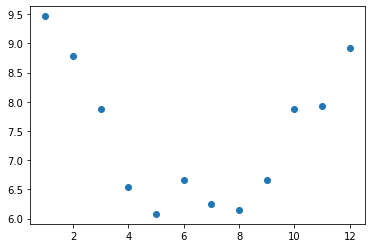

[9.466129032258065,
 8.786725663716814,
 7.883064516129032,
 6.546666666666667,
 6.07983870967742,
 6.654166666666667,
 6.253225806451613,
 6.148387096774194,
 6.658333333333333,
 7.879032258064516,
 7.926666666666667,
 8.923387096774194]

In [ ]:
def algo2(mix,magnitud):
  try:
    a = mix.groupby('MAGNITUD').get_group(magnitud).groupby('MES').ValContam.mean().to_list()
    fig , ax = plt.subplots()
    meses=[1,2,3,4,5,6,7,8,9,10,11,12]
    ax.scatter(meses,a)
    plt.show()
  except:
    print("ERROR, magnitud no encontrada")

algo2(mix_ordenado,1)

###CLASES



1) Mostrar por pantalla las estaciones y los contaminantes disponibles
2) Mostrar un resumen descriptivo para cada contaminante
3) Mostrar un resumen descriptivo para cada contaminente por distritos.
4) Mostrar serie con las emisiones del contaminante dado en la estación y rango de fechas dado.
5) Mostrar un DataFrame con las medias mensuales de los distintos tipos de contaminantes segun la estacion dada
6) Mostrar un diccionario con las medias de las estaciones de medición de la magnitud durante ese mes.
7) Mostrar un gráfico con las medias mensuales para cada estación de medición



Ingrese una opcion (0 para salir): 7
Ingrese la magnitud buscada: 1
ERROR, magnitud no encontrada


1) Mostrar por pantalla las estaciones y los contaminantes disponibles
2) Mostrar un resumen descriptivo para cada contaminante
3) Mostrar un resumen descriptivo para cada contaminente por distritos.
4) Mostrar serie con las emisiones del contaminante dado en la estación y rango de fechas dado.
5) Mostrar

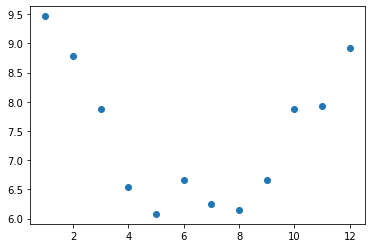



1) Mostrar por pantalla las estaciones y los contaminantes disponibles
2) Mostrar un resumen descriptivo para cada contaminante
3) Mostrar un resumen descriptivo para cada contaminente por distritos.
4) Mostrar serie con las emisiones del contaminante dado en la estación y rango de fechas dado.
5) Mostrar un DataFrame con las medias mensuales de los distintos tipos de contaminantes segun la estacion dada
6) Mostrar un diccionario con las medias de las estaciones de medición de la magnitud durante ese mes.
7) Mostrar un gráfico con las medias mensuales para cada estación de medición



Ingrese una opcion (0 para salir): 0


In [ ]:
class DataF:
  def __init__(self):
    self.df = self.generar()
    self.todo = self.generarTodo()
    self.df_filtro = self.filtrar(self.df)
    self.df_largo = self.reestructurar()
    self.df_ord = self.aniadirFecha()
    self.est= {
  1: 'P.Recoletos',
  2: 'Glta.de Carlos V',
  35: 'Pza. del Carmen',
  4: 'Pza. de España',
  39: 'Barrio del Pilar',
  6: 'Pza. Dr. Marañón',
  7: 'Pza. M. de Salamanca',
  8: 'Escuelas Aguirre',
  9: 'Pza. Luca de Tena',
  38: 'Cuatro Caminos',
  11: 'Av. Ramón y Cajal',
  12: 'Pza. Manuel Becerra',
  40: 'Vallecas',
  14: 'Pza. Fdez. Ladreda',
  15: 'Pza. Castilla',
  16: 'Arturo Soria',
  17: 'Villaverde Alto',
  18: 'Calle Farolillo',
  19: 'Huerta Castañeda',
  36: 'Moratalaz',
  21: 'Pza. Cristo Rey',
  22: 'P. Pontones',
  23: 'Final C/ Alcalá',
  24: 'Casa de Campo',
  25: 'Santa Eugenia',
  26: 'Urb. Embajada (Barajas)',
  27: 'Barajas',
  47: 'Méndez Álvaro',
  48: 'P. Castellana',
  49: 'Retiro',
  50: 'Pza. Castilla',
  54: 'Ensanche Vallecas',
  55: 'Urb. Embajada (Barajas)',
  56: 'Plaza Elíptica',
  57: 'Sanchinarro',
  58: 'El Pardo',
  59: 'Parque Juan Carlos I',
  60: 'Tres Olivos'
}
    self.cont= {
  1: 'P.Recoletos',
  2: 'Glta.de Carlos V',
  35: 'Pza. del Carmen',
  4: 'Pza. de España',
  39: 'Barrio del Pilar',
  6: 'Pza. Dr. Marañón',
  7: 'Pza. M. de Salamanca',
  8: 'Escuelas Aguirre',
  9: 'Pza. Luca de Tena',
  38: 'Cuatro Caminos',
  11: 'Av. Ramón y Cajal',
  12: 'Pza. Manuel Becerra',
  40: 'Vallecas',
  14: 'Pza. Fdez. Ladreda',
  15: 'Pza. Castilla',
  16: 'Arturo Soria',
  17: 'Villaverde Alto',
  18: 'Calle Farolillo',
  19: 'Huerta Castañeda',
  36: 'Moratalaz',
  21: 'Pza. Cristo Rey',
  22: 'P. Pontones',
  23: 'Final C/ Alcalá',
  24: 'Casa de Campo',
  25: 'Santa Eugenia',
  26: 'Urb. Embajada (Barajas)',
  27: 'Barajas',
  47: 'Méndez Álvaro',
  48: 'P. Castellana',
  49: 'Retiro',
  50: 'Pza. Castilla',
  54: 'Ensanche Vallecas',
  55: 'Urb. Embajada (Barajas)',
  56: 'Plaza Elíptica',
  57: 'Sanchinarro',
  58: 'El Pardo',
  59: 'Parque Juan Carlos I',
  60: 'Tres Olivos'
}
    return

#EJERCICIO 1
  def generar(self):
    # Leo los archivos y los guardo como dataframes
    em16 = pd.read_csv('emisiones-2016.csv',sep=';',decimal=',')
    em17 = pd.read_csv('emisiones-2017.csv',sep=';',decimal=',')
    em18 = pd.read_csv('emisiones-2018.csv',sep=';',decimal=',')
    em19 = pd.read_csv('emisiones-2019.csv',sep=';',decimal=',')
    # Uno todos los dataFrame en 1 solo 
    mix =  pd.concat([em16,em17,em18,em19])
    self.todo =  pd.concat([em16,em17,em18,em19])
    return mix
  
  def generarTodo(self):
    #Me fijo si las columnas son las que necesitamos y sino las borramos
    deseados = ['PROVINCIA','MUNICIPIO','ESTACION','ANO','MES']
    for i in self.todo.columns: 
      #para las columnas de dias nos fijamos si tiene la D
      if 'D' in i:
        continue
      elif i not in deseados:
        del self.todo[i]
    #print(df)
    return self.todo

#EJERCICIO 2
  def filtrar(self,df):
    #Me fijo si las columnas son las que necesitamos y sino las borramos
    deseados = ['ESTACION','ANO','MES']
    for i in df.columns: 
      #para las columnas de dias nos fijamos si tiene la D
      if 'D' in i:
        continue
      elif i not in deseados:
        del df[i]
    #print(df)
    return df

#EJERCICIO 3
  def reestructurar(self):
    #Reestructuramos el dataframe de forma vertical o larga
    self.df_largo = self.df_filtro.melt(id_vars=[ 'ESTACION' , 'MAGNITUD', 'ANO', 'MES'] , var_name= 'DIAS' , value_name='ValContam' )
    #print(self.df_largo)
    return self.df_largo

#EJERCICIO 4 
  def aniadirFecha(self):
    # Se crea las listas con los datos 
    anos= self.df_largo['ANO'].tolist()
    meses= self.df_largo['MES'].tolist()
    # Quita las D de los dias 
    dias= self.df_largo['DIAS'].str.strip('D').tolist()

    fechas = []

    #le damos formato a los datos para que se guarden en una lista como datetime
    for i in range(len(self.df_largo)):
      fecha= str(anos[i]) + "-" + str(meses[i]) + "-" + str(dias[i])
      try:
        fechaD=dt.datetime.strptime(fecha,'%Y-%m-%d')
        fechas.append(fechaD)
      except:
        fechas.append(pd.NaT)
        continue

    self.df_largo['FECHAS']= fechas
    #print(self.df_largo)
    
    return self.fechaInvalida()

#EJERCICIO 5
  def fechaInvalida(self):
    #eliminamos fechas invalidas
    self.df_largo.drop(self.df_largo[np.isnat(self.df_largo['FECHAS'])].index, inplace=True)
    df_ordenado = self.df_largo.sort_values(by=['ESTACION','MAGNITUD','FECHAS'], ascending=True)
    #print(df_ordenado)
    return df_ordenado

#EJERCICIO 6
  def estac_contam(self):    
    #hacemos las listas por comprension 
    estacionDisponible = [self.est[x] for x in self.est.keys() if x in self.df_ord['ESTACION']]

    datosConta= [self.cont[x] for x in self.cont.keys() if x in self.df_ord['MAGNITUD']]

    print("Estaciones Disponibles")
    print(estacionDisponible)
    print("Datos Contaminantes")
    print(datosConta)
    return

#EJERCICIO 7
  def medias(self):
    self.df_ord['ValContam']=self.df_ord['ValContam'].apply(float)
    
    return print(self.df_ord.groupby('MAGNITUD').ValContam.describe())

#EJERCICIO 8
  def ej8(self):
    self.todo = self.todo.melt(id_vars=[ 'PROVINCIA','MUNICIPIO','ESTACION' , 'MAGNITUD', 'ANO', 'MES'] , var_name= 'DIAS' , value_name='ValContam' )
    self.todo['ValContam']=self.todo['ValContam'].apply(float)
    return print(self.todo.groupby(['PROVINCIA','MUNICIPIO']).ValContam.describe())
  
#EJERCICIO 9
  def devolver_Emisiones(self,estacion,contaminante,fecha1,fecha2):
    nuevodf = pd.DataFrame(self.df_ord)
    nuevodf = nuevodf.drop(['ANO','MES','DIAS'], axis =1 )  
    nuevodf = nuevodf.drop(nuevodf[nuevodf['ESTACION'] != estacion].index)
    nuevodf = nuevodf.drop(nuevodf[nuevodf['MAGNITUD'] != contaminante].index)
    nuevodf = nuevodf.drop(nuevodf[nuevodf['FECHAS'] <= fecha1].index)
    nuevodf = nuevodf.drop(nuevodf[nuevodf['FECHAS'] >= fecha2].index)
    return print(nuevodf.ValContam)

#EJERCICIO 10 
  def medidasMensuales(self,estacion):
    df=pd.DataFrame(self.df_ord)
    df['ValContam']= df['ValContam'].apply(float)
    try:
      df=df.groupby('ESTACION').get_group(estacion).groupby(['MAGNITUD','MES']).ValContam.agg(np.mean)
      return print(df)
    except:
      print("ERROR, estacion no encontrada.")

#EJERCICIO 11
  def mediaPorMes(self,mes,magnitud):
    df=pd.DataFrame(self.df_ord)
    df['ValContam']= df['ValContam'].apply(float)
    try:
      df=df.groupby(['MAGNITUD','MES']).get_group((magnitud,mes)).groupby('ESTACION').ValContam.mean()
      return print(df.to_dict())
    except:
      print("ERROR, datos de magnitud y mes no coincidentes.")

#EJERCICIO 12
  def grafico(self,magnitud):
    try:
      a = self.df_ord.groupby('MAGNITUD').get_group(magnitud).groupby('MES').ValContam.mean().to_list()
      fig , ax = plt.subplots()
      meses=[1,2,3,4,5,6,7,8,9,10,11,12]
      ax.scatter(meses,a)
      plt.show()
    except:
      print("ERROR, magnitud no encontrada")


#MENU
class Menu:
  def mostrar(self):
    print("")
    print("")
    print("1) Mostrar por pantalla las estaciones y los contaminantes disponibles")
    print("2) Mostrar un resumen descriptivo para cada contaminante")
    print("3) Mostrar un resumen descriptivo para cada contaminente por distritos.")
    print("4) Mostrar serie con las emisiones del contaminante dado en la estación y rango de fechas dado.")
    print("5) Mostrar un DataFrame con las medias mensuales de los distintos tipos de contaminantes segun la estacion dada")
    print("6) Mostrar un diccionario con las medias de las estaciones de medición de la magnitud durante ese mes.")
    print("7) Mostrar un gráfico con las medias mensuales para cada estación de medición")

    print("")
    print("")
    print("")





m= Menu()
obj = DataF()
opc=100
while opc != 0:
  m.mostrar()
  opc=int(input("Ingrese una opcion (0 para salir): "))
  if opc == 1:
    obj.estac_contam()
  elif opc == 2:
    obj.medias()
  elif opc == 3:
    obj.ej8()
  elif opc == 4:
    cont= int(input("Ingrese el codigo del contaminante: "))
    est= int(input("Ingrese el codigo de la estacion: "))
    inicio= dt.datetime.strptime(input("Ingrese fecha de inicio (AAAA-MM-DD): "),'%Y-%m-%d')
    fin= dt.datetime.strptime(input("Ingrese fecha de fin (AAAA-MM-DD): "),'%Y-%m-%d')
    obj.devolver_Emisiones(est,cont,inicio,fin)
  elif opc == 5:
    est= int(input("Ingrese el codigo de la estacion: "))
    obj.medidasMensuales(est)
  elif opc == 6:
    mes= int(input("Ingrese el mes buscado: "))
    mag= int(input("Ingrese la magnitud buscada: "))
    obj.mediaPorMes(mes,mag)
  elif opc== 7:
    mag= int(input("Ingrese la magnitud buscada: "))
    obj.grafico(mag)